In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import gurobipy as gp
from gurobipy import GRB
import scipy.sparse as sp

## Parameters

## Data Loading

In [26]:
solar = pd.read_csv('Solar_Data_Zurich.csv', header=None, names=['Solar radiation [W/m2]']) #hourly resolution, 2019
#access days from 7th of april to 11th of april 2019
start_day = 7
end_day = 11
days_before_april = 31 + 28 + 31  # Jan + Feb + Mar = 90
start_index = (days_before_april + start_day - 1) * 24
end_index = (days_before_april + end_day) * 24
solar = solar.iloc[start_index:end_index]
hourly_index = pd.date_range(start='2019-04-07', periods=120, freq='H')
solar.index = hourly_index
quarter_hourly_index = pd.date_range(start='2019-04-07', periods=480, freq='15T')
solar_interpolated = solar.reindex(quarter_hourly_index)
solar_interpolated = solar_interpolated.interpolate(method='linear') #Interpolate missing values linearly
print(solar_interpolated.shape)


(480, 1)


/var/folders/0w/44rywk3j1dl_gqy839v3wqyh0000gn/T/ipykernel_30016/498473070.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_index = pd.date_range(start='2019-04-07', periods=120, freq='H')
/var/folders/0w/44rywk3j1dl_gqy839v3wqyh0000gn/T/ipykernel_30016/498473070.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  quarter_hourly_index = pd.date_range(start='2019-04-07', periods=480, freq='15T')


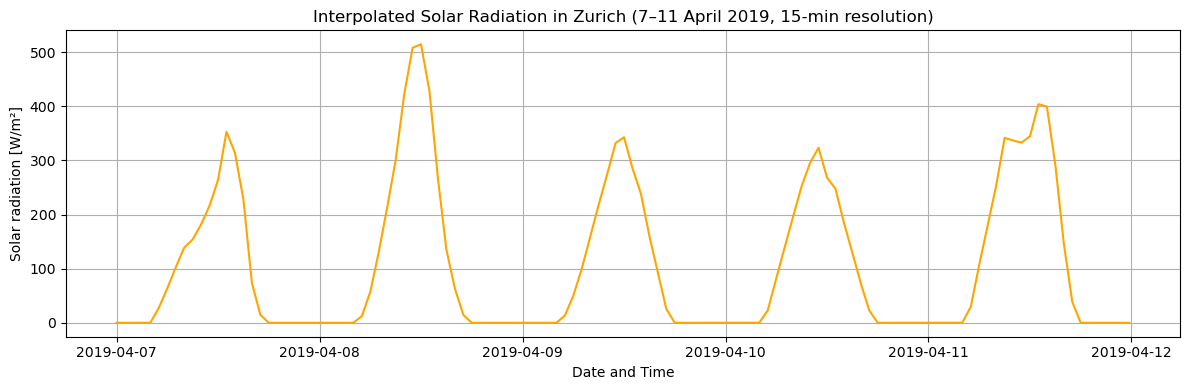

In [29]:
# Plot the interpolated 15-minute resolution data
plt.figure(figsize=(12, 4))
plt.plot(solar_interpolated.index, solar_interpolated['Solar radiation [W/m2]'], color='orange')
plt.title('Interpolated Solar Radiation in Zurich (7–11 April 2019, 15-min resolution)')
plt.xlabel('Date and Time')
plt.ylabel('Solar radiation [W/m²]')
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
solar_interpolated.head(480)

,Solar radiation [W/m2]
2019-04-07 00:00:00,0.0
2019-04-07 00:15:00,0.0
2019-04-07 00:30:00,0.0
2019-04-07 00:45:00,0.0
2019-04-07 01:00:00,0.0
...,...
2019-04-11 22:45:00,0.0
2019-04-11 23:00:00,0.0
2019-04-11 23:15:00,0.0
2019-04-11 23:30:00,0.0


In [ ]:
# Copy original irradiance values (W/m²)
irradiance_wm2 = solar_interpolated['Solar radiation [W/m2]']

# Convert to energy in kWh/m² for each 15-minute interval
energy_kwhm2 = irradiance_wm2 * 0.25 / 1000

# Create a new column or DataFrame
solar_energy = pd.DataFrame({
    'Energy [kWh/m²]': energy_kwhm2
}, index=solar_interpolated.index)

solar_energy.head(40)

,Energy [kWh/m²]
2019-04-07 00:00:00,0.000000
2019-04-07 00:15:00,0.000000
2019-04-07 00:30:00,0.000000
2019-04-07 00:45:00,0.000000
2019-04-07 01:00:00,0.000000
2019-04-07 01:15:00,0.000000
2019-04-07 01:30:00,0.000000
2019-04-07 01:45:00,0.000000
2019-04-07 02:00:00,0.000000
2019-04-07 02:15:00,0.000000


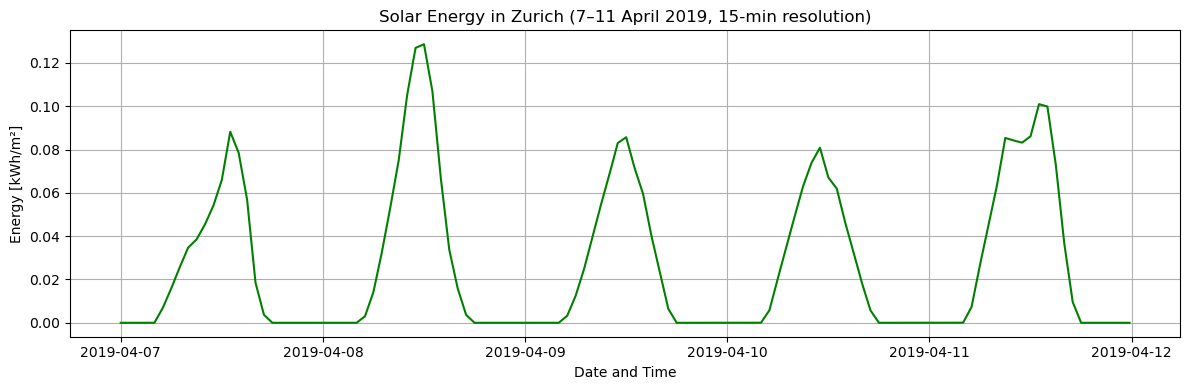

In [38]:
# Plot the solar energy (kWh/m²) at 15-minute intervals
plt.figure(figsize=(12, 4))
plt.plot(solar_energy.index, solar_energy['Energy [kWh/m²]'], color='green')
plt.title('Solar Energy in Zurich (7–11 April 2019, 15-min resolution)')
plt.xlabel('Date and Time')
plt.ylabel('Energy [kWh/m²]')
plt.grid(True)
plt.tight_layout()
plt.show()

solar_energy.to_csv('Solar_Energy_Zurich_15min.csv')